<a href="https://colab.research.google.com/github/EddyGiusepe/Sistema_RECOMENDACION_Netflix/blob/main/Netflix_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>**Sistema de recomendação de filmes na Netflix com Python**</h2> 


**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro

## 1. Importamos as nossas bibliotecas 

In [1]:
import numpy as np # Algebra linear
import pandas as pd # Para processar nossos Dados
import matplotlib.pyplot as plt
%matplotlib inline

import time
import seaborn as sns
import re
import math

import plotly.express as px

## 2. Carregamos nossos Dados 

In [2]:
df = pd.read_csv("/content/drive/MyDrive/4_teoria_IA_ML_DL_Eddy/Sistema_recomendacion_Netflix/netflix_titles.csv")

In [3]:
df.shape

(7787, 12)

In [4]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1137,s1138,Movie,Bully,Lee Hirsch,NaN,United States,"September 29, 2020",2012,PG-13,98 min,Documentaries,This eye-opening documentary tracks the storie...
3838,s3839,TV Show,Mad Men,NaN,"Jon Hamm, Elisabeth Moss, Vincent Kartheiser, ...",United States,"March 22, 2015",2014,TV-14,7 Seasons,TV Dramas,"Set in 1960s New York City, this award-winning..."
1899,s1900,Movie,Dying to Tell,Hernán Zin,NaN,Spain,"May 17, 2019",2018,TV-MA,88 min,"Documentaries, International Movies",Seeking answers after a life-changing incident...
7656,s7657,Movie,Wonho Chung: Live in New York,Shaun Mir,Wonho Chung,NaN,"September 11, 2020",2014,TV-14,69 min,Stand-Up Comedy,At the Comic Strip's first Arabic stand-up sho...
3363,s3364,Movie,Kia and Cosmos,Sudipto Roy,"Ritwika Pal, Swastika Mukherjee, Joy Sengupta",India,"May 1, 2019",2018,TV-14,124 min,"Dramas, Independent Movies, International Movies",A 15-year-old girl with autism attempts to wri...
4353,s4354,TV Show,My Secret Romance,NaN,"Sung Hoon, Song Ji-eun, Kim Jae-young, Jeong D...",South Korea,"April 25, 2020",2017,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A nutritionist gets entangled in a series of m...
7332,s7333,TV Show,Under the Black Moonlight,NaN,"Tae-hyun Nam, Soo-yeon Kim, Seo-ra Kim, Tae-hw...",South Korea,"June 10, 2017",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Dr...",A college art club welcomes a new member who h...
5529,s5530,Movie,SGT. Will Gardner,Max Martini,"Max Martini, Omari Hardwick, Lily Rabe, Elisab...",United States,"May 19, 2019",2019,TV-MA,125 min,Dramas,A homeless vet who has PTSD steals a motorcycl...
2763,s2764,TV Show,Hoarders,NaN,NaN,NaN,"May 2, 2020",2019,TV-PG,1 Season,Reality TV,This reality series enters the worlds of compu...
4107,s4108,Movie,MindGamers,Andrew Goth,"Tom Payne, Melia Kreiling, Antonia Campbell-Hu...",Austria,"January 15, 2020",2017,R,99 min,"International Movies, Sci-Fi & Fantasy, Thrillers",Brilliant young students discover a breakthrou...


## 3. Análise e limpeza de nossos Dados

In [5]:
# Aqui só a coluna "release_year" é do tipo inteiro

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Aqui ver a quantidade total de valores MISSING
# As colunas: director, cast, country, date_added e rating apresentam valores Missing. 

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# Outra maneira de visualizar os valores MISSING é:

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

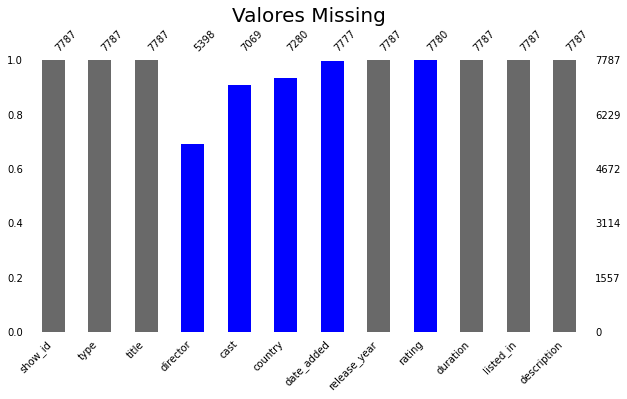

In [8]:
# Aqui vamos a usar o seguinte método para visualizar os Dados MISSING
# As colunas "director" e "cast" podem ser eliminadas, já que não podem ser completadas aleatoriamente (obvio: valores muitos versáteis)
# Para um número mínimo de valores Missing nas colunas "country", "date_added" e "rating", podemos completar eles usando a MODA ou a MÉDIA.

import missingno 

color = ["dimgrey","dimgrey","dimgrey","blue","blue","blue","blue","dimgrey","blue","dimgrey","dimgrey","dimgrey"]
missingno.bar(df, fontsize=10, color=color, figsize=(10, 5))
plt.title("Valores Missing", fontsize=20)
plt.show()


In [9]:
# Ideia na coluna "country"

df["country"].value_counts()

United States                               2555
India                                        923
United Kingdom                               397
Japan                                        226
South Korea                                  183
                                            ... 
Spain, Cuba                                    1
United Kingdom, Denmark, Canada, Croatia       1
United Kingdom, United States, Morocco         1
United States, Spain, Italy                    1
Spain, Thailand, United States                 1
Name: country, Length: 681, dtype: int64

In [10]:
# Facilmente podemos observar que o valor mais comum é: "United States". 
# É a moda!

df["country"].mode()[0]

'United States'

In [11]:
# Ideia na coluna "rating"

df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [12]:
df["rating"].mode()[0]

'TV-MA'

In [13]:
# Aqui vamos a tratar os campos mencioandos acima

df["country"] = df["country"].fillna(df["country"].mode()[0])
df["date_added"] = df["date_added"].fillna(df["date_added"].mode()[0]) 
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])


In [14]:
# Aqui, novamente, visualizamos a quantidade total de valores MISSING 

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
# A seguir ELIMINAMOS as LINHAS em: "cast" e "director" (os motivos foi explicado acima)

df = df.dropna(how="any", subset=["cast", "director"])


In [16]:
df.shape

(4979, 12)

In [17]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...


In [18]:
# Mais uma vez visualizamos nossos Dados
# Podemos ve que já não teremos valores missing

df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
df.shape

(4979, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4979 entries, 1 to 7783
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4979 non-null   object
 1   type          4979 non-null   object
 2   title         4979 non-null   object
 3   director      4979 non-null   object
 4   cast          4979 non-null   object
 5   country       4979 non-null   object
 6   date_added    4979 non-null   object
 7   release_year  4979 non-null   int64 
 8   rating        4979 non-null   object
 9   duration      4979 non-null   object
 10  listed_in     4979 non-null   object
 11  description   4979 non-null   object
dtypes: int64(1), object(11)
memory usage: 505.7+ KB


In [21]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [22]:
# A seguir adicionamos algumas "novas colunas" (na verdade trocamos de nomes)

df = df.rename(columns={"listed_in":"Genero"})


In [23]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [24]:
df["Genero"] = df["Genero"].apply(lambda x: x.split(",")[0]) 

In [25]:
# Ao aplicar a função anterior, observaremos que só pegamos a primeira frase da coluna "Gênero"

df["Genero"].head(4)

1                Dramas
2         Horror Movies
3    Action & Adventure
4                Dramas
Name: Genero, dtype: object

In [26]:
# Nesta coluna só teremos os anos do filme, série, etc 

df["year_add"] = df['date_added'].apply(lambda x: x.split(" ")[2]) # aqui pode substituir também: 2 --> -1

In [27]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description,year_add
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018


In [28]:
# Vamos adicionar os meses também, assim:

df["month_add"] = df['date_added'].apply(lambda x: x.split(" ")[0])
df["month_add"].head()

1    December
2    December
3    November
4     January
5        July
Name: month_add, dtype: object

In [29]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description,year_add,month_add
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December


In [30]:
# Para país, só pegamos o principal (main). Ou seja a primeira posição

df["country_main"] = df['country'].apply(lambda x: x.split(",")[0])
df["country_main"].head(5)

1           Mexico
2        Singapore
3    United States
4    United States
5           Turkey
Name: country_main, dtype: object

In [31]:
# A seguir vamos a contabilizar os filmes e as séries de programação.
# Observamos a contagem e a porcentagem

count = df["type"].value_counts()
percent = 100*df['type'].value_counts(normalize=True)
pd.DataFrame({"count":count, "percent":percent.round(1)})

# NOTA: Aqui observamos que a maioria do conteúdo da Netflix representa o 97.1% e apenas o 2.9% são TV Show. 

,count,percent
Movie,4834,97.1
TV Show,145,2.9


In [32]:
# Como podemos observar aqui: TV-MA, TV-14 e R ocupam os três primeiros lugares em preferência 

count = df["rating"].value_counts()
percent = 100*df['rating'].value_counts(normalize=True)
pd.DataFrame({"count":count, "percent":percent.round(1)})

,count,percent
TV-MA,1728,34.7
TV-14,1183,23.8
R,656,13.2
TV-PG,426,8.6
PG-13,378,7.6
PG,241,4.8
TV-Y,90,1.8
TV-G,85,1.7
TV-Y7,82,1.6
NR,62,1.2


In [33]:
# A seguir criamos dois DataFrames: um para a coleção de filmes e outro para a coleção de programas de TV

movie_df = df[df["type"]== "Movie"]
tv_df = df[df["type"]== "TV Show"]


In [34]:
# Visualizamos o DataFrame

movie_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description,year_add,month_add,country_main
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,November,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,United States
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,Horror Movies,"After an awful accident, a couple admitted to ...",2020,June,Egypt
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,2019,November,United States
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,Horror Movies,"When a doctor goes missing, his psychiatrist w...",2019,April,India
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,Horror Movies,An architect and his wife move into a castle t...,2017,December,India
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,Dramas,A farmer pens a confession admitting to his wi...,2017,October,United States
13,s14,Movie,"2,215",Nottapon Boonprakob,Artiwara Kongmalai,Thailand,"March 1, 2019",2018,TV-MA,89 min,Documentaries,This intimate documentary follows rock star Ar...,2019,March,Thailand


In [35]:
# Imprimimos o DataFrame

tv_df.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description,year_add,month_add,country_main
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,International TV Shows,A genetics professor experiments with a treatm...,2017,July,Turkey
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019,July,India
218,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,"November 11, 2020",2020,TV-14,1 Season,International TV Shows,Gloria Groove and Alexia Twister make drag dre...,2020,November,Brazil
260,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,"March 9, 2018",2018,TV-14,1 Season,Anime Series,Everything Aiko knew was a lie. Now she's join...,2018,March,Japan
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada","July 1, 2020",2019,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020,July,United States
284,s285,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,International TV Shows,"Led by a trio of Korean celebs, a multinationa...","4,",,South Korea


## 3. Análise e exploração de nossos Dados 

### <font color="orange">Movie Vs TV Show</font>

In [36]:
fig = px.histogram(df,
                   x = "type",
                   template = "plotly_dark",
                   color_discrete_sequence = ["forestgreen", "darkorange", "gold", "deeppink"],
                   title = "Tipo de Programas")
fig.update_layout(bargap = 0.1)
fig.show()


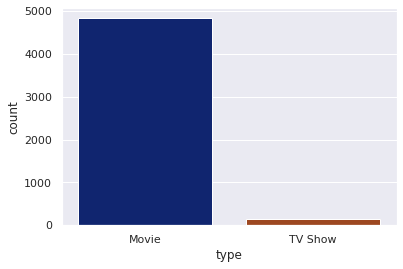

In [37]:
# Também podemos graficar o anterior usando SEABORN

sns.set(style = "darkgrid")
sns.countplot(x = "type", data = df, palette = "dark")

### <font color="orange">Analisando o Rating de Movies e TV Shows</font>

No seguinte gráfico podemos extrair os seguintes Insights:

* A maior classificação é para TV-MA. Está classificação é fundamentalmente para um público com maior maturidade.

* A segunda classificação, significa que o conteúdo puede ser inapropriado para crianças menores de $14$ anos de Idade.

* A seguinte classificação, R. Esta classificação é um filme que não é adequado para menores de $17$ anos de Idade.

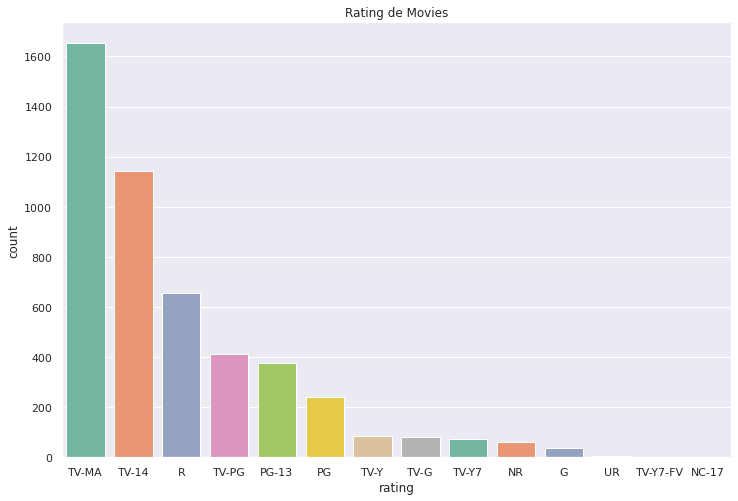

In [38]:
# Movies Rating

plt.figure(figsize=(12, 8))
sns.set(style = "darkgrid")
sns.countplot(x = "rating", data = movie_df, palette = "Set2", order = movie_df["rating"].value_counts().index[0:15])
plt.title("Rating de Movies");


No seguinte gráfico podemos extrair os seguintes Insights:

* A maioria dos programas de televisão tem classificação TV-14, o que significa que o conteúdo pode ser inapropriado para crianças menores de $14$ anos de Idade.

*  Analisar com mais detalhes...... !

* Os programas de televisão em menor quantidade tem classificações "R".



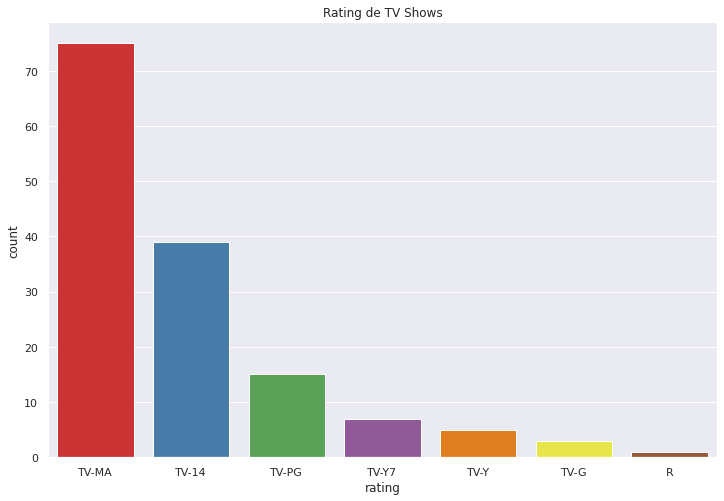

In [39]:
# TV Shows Rating

plt.figure(figsize=(12, 8))
sns.set(style = "darkgrid")
sns.countplot(x = "rating", data = tv_df, palette = "Set1", order = tv_df["rating"].value_counts().index[0:15])
plt.title("Rating de TV Shows");

### <font color="orange">Análise do conteúdo por ano</font>

No seguinte gráfico podemos extrair os seguintes Insights:

* No gráfico observamos que a Netflix produziu maior conteúdo no ano $2017$.

* A Netflix teve um bom crescimento a partir do ano $2015$.

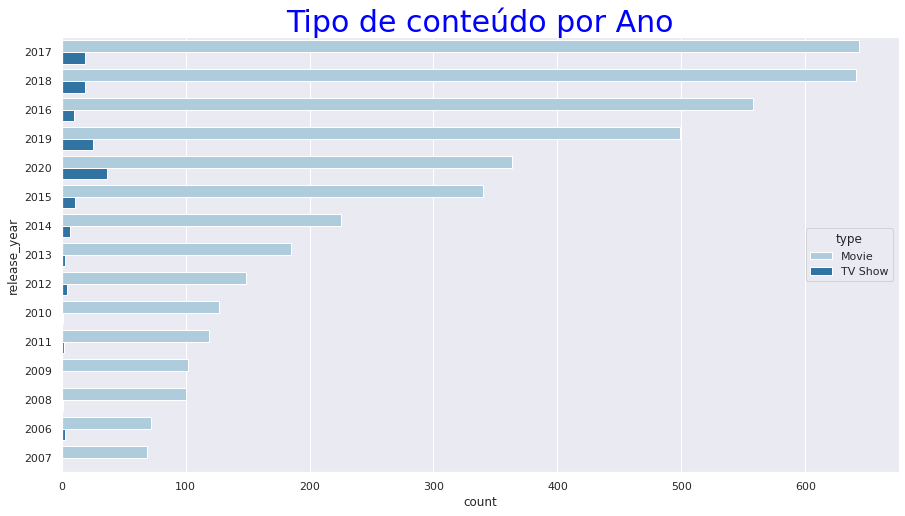

In [40]:
plt.figure(figsize=(15, 8))
sns.set(style = "darkgrid")
sns.countplot(y = "release_year", data = df, palette = "Paired", order = df["release_year"].value_counts().index[0:15], hue = df["type"])
plt.title("Tipo de conteúdo por Ano", fontsize = 30, color = "blue");

### <font color="orange">Análise de duração de Movies</font>


In [41]:
movie_df["duration"] = movie_df["duration"].str.replace("min", "")
movie_df["duration"] = movie_df["duration"].astype(str).astype(int)
movie_df["duration"] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7778     88
7780     94
7781     88
7782     99
7783    111
Name: duration, Length: 4834, dtype: int64

Na seguinte imagem podemos extrair o seguinte Insight:

* A maioria dos filmes da Netflix tem uma duração entre $75$ e $120$ minutos.

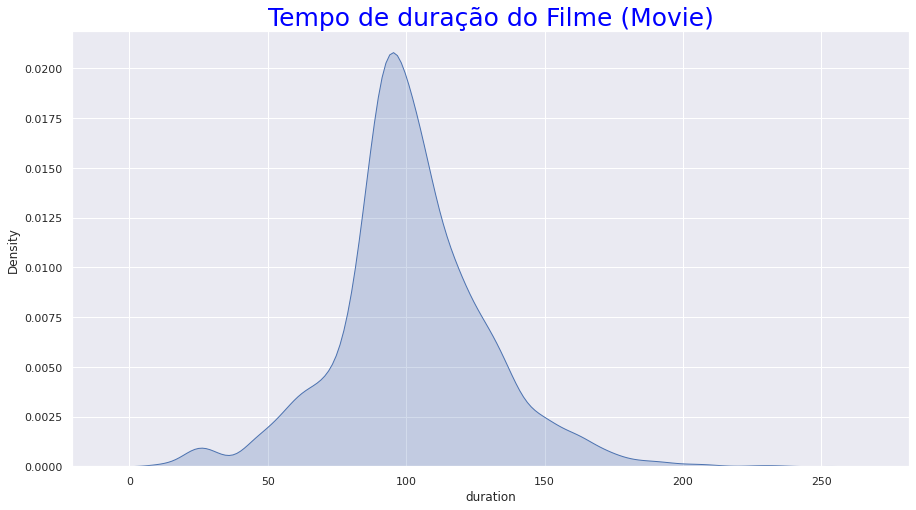

In [42]:
plt.figure(figsize=(15, 8))
sns.set(style = "darkgrid")
sns.kdeplot(data = movie_df["duration"], shade = True)
plt.title("Tempo de duração do Filme (Movie)", fontsize = 25, color = "blue");


### <font color="orange">Tendência de duração dos Filmes (Movies)</font>

Insight do seguinte gráfico:

* Entre os anos de $1960$ e $1965$, a duração dos filmes era de aproximadamente 200 minutos. Observamos, também, que depois do ano de $1965$ a duração dos filmes baixo a $130$ minutos aproximadamente.

* A partir do ano de $1980$ a tendência da duração dos filmes foi constante, foi entre $100$ e $150$ minutos.

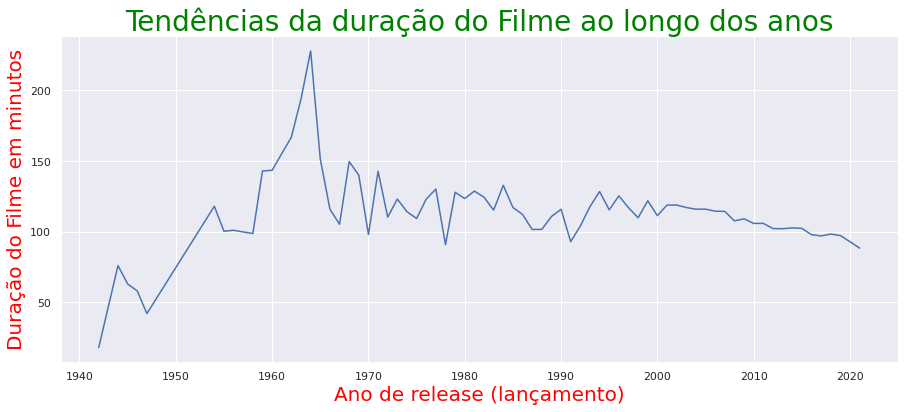

In [43]:
duration_year = movie_df.groupby(["release_year"]).mean()
duration_year = duration_year.sort_index()

plt.figure(figsize = (15, 6))
sns.set(style = "darkgrid")
sns.lineplot(x = duration_year.index, y = duration_year.duration.values)
#plt.box(on = None)
plt.ylabel("Duração do Filme em minutos", fontsize = 20, color = "Red")
plt.xlabel("Ano de release (lançamento)", fontsize = 20, color = "Red")
plt.title("Tendências da duração do Filme ao longo dos anos", fontsize = 28, color = "Green");



### <font color="orange">Análise de TV Show com mais Temporadas</font>


In [44]:
tv_df["duration"] = tv_df["duration"].str.replace("Season", "")
tv_df["duration"] = tv_df["duration"].str.replace("s", "")
tv_df["duration"] = tv_df["duration"].astype(str).astype(int)
tv_df["duration"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

5       1
132     1
218     1
260     1
276     1
       ..
7385    1
7400    4
7492    1
7666    2
7721    2
Name: duration, Length: 145, dtype: int64

In [45]:
# Aqui vamos a extrair os Títulos dos programas de Televisão e seu número de temporadas

#Extraímos as seguintes colunas
columns = ["title", "duration"]
tv_shows = tv_df[columns]


In [46]:
# sort the DataFrame by number of seasons
tv_shows = tv_shows.sort_values(by = "duration", ascending = False)   # tv_shows.shape ==> (145, 2) 

# tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
5912,Supernatural,15
4404,Naruto,9
1181,Call the Midwife,9
584,Arrow,8
6415,The Great British Baking Show,8
5291,Royal Pains,8
6359,The Flash,6
2130,Father Brown,6
1470,Comedians in Cars Getting Coffee,6
2313,Fullmetal Alchemist: Brotherhood,5


<Figure size 7200x432 with 0 Axes>

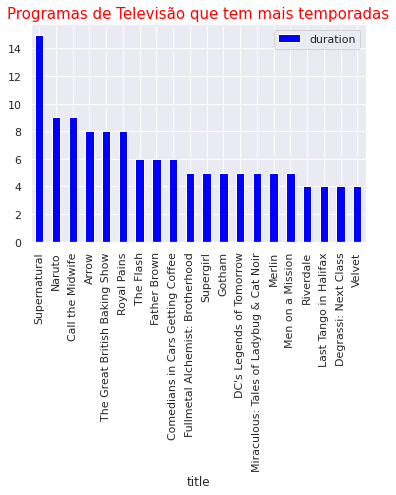

In [47]:
# A seguir visualizamos a análise anterior:

plt.figure(figsize = (100, 6))
top20.plot(kind = "bar", x = "title", y = "duration", color = "blue")
plt.title("Programas de Televisão que tem mais temporadas", fontsize = 15, color = "red");



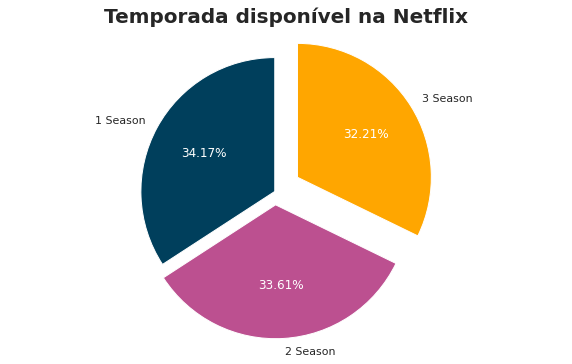

In [48]:
# TV Shows e suas temporadas

plt.figure(figsize = (10, 6))
labels = ["1 Season", "2 Season", "3 Season"]
_, _, texts = plt.pie(df.duration.value_counts()[:3], labels = labels, autopct = "%1.2f%%", startangle = 90,
                      explode = (0.0, 0.1, 0.2), colors = ["#003f5c", "#bc5090", "#ffa600"])


plt.axis("equal")
plt.title("Temporada disponível na Netflix", fontsize = 20, fontweight = "bold")


for text in texts:
  text.set_color("white")


### <font color="orange">Paises no teto para a criação de conteúdo de Filmes</font>

Insights: 

* Os três primeiros paises: **Estados Unidos** cria a maior quantidade de filmes, seguido da **India** e logo pelo **Reino Unido**.

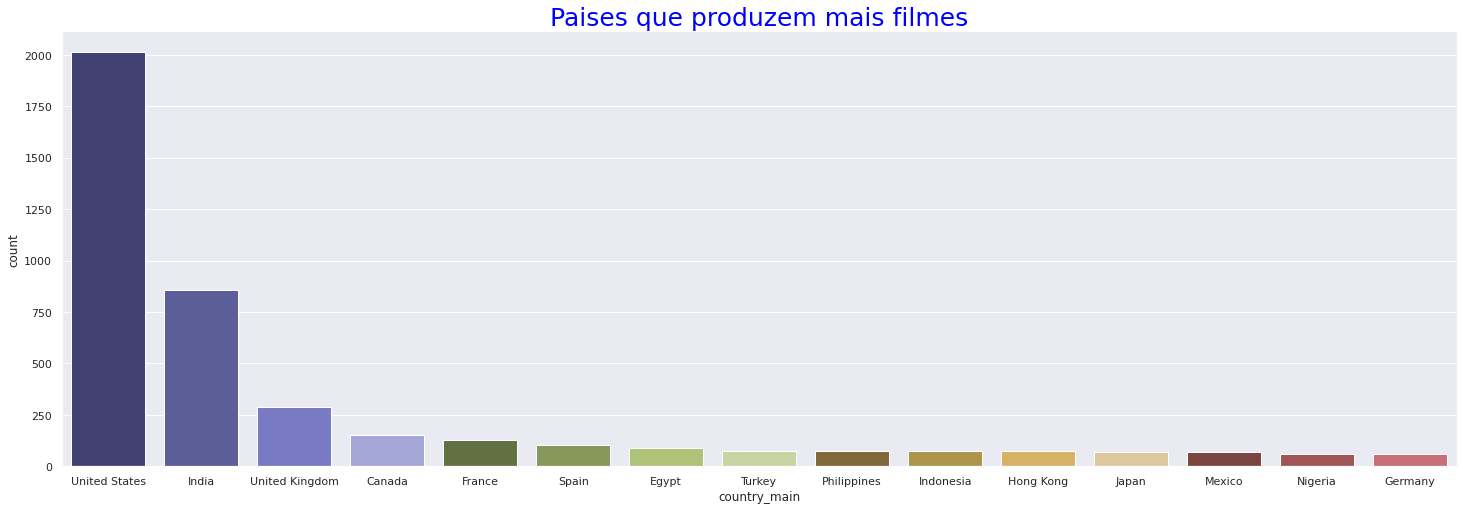

In [49]:
plt.figure(figsize=(25, 8))
sns.set(style = "darkgrid")
sns.countplot(x = "country_main", data = movie_df, palette = "tab20b", order = movie_df["country_main"].value_counts().index[0:15])
plt.title("Paises que produzem mais filmes", fontsize = 25, color = "blue");

### <font color="orange">Paises que criam mais TV Show</font>


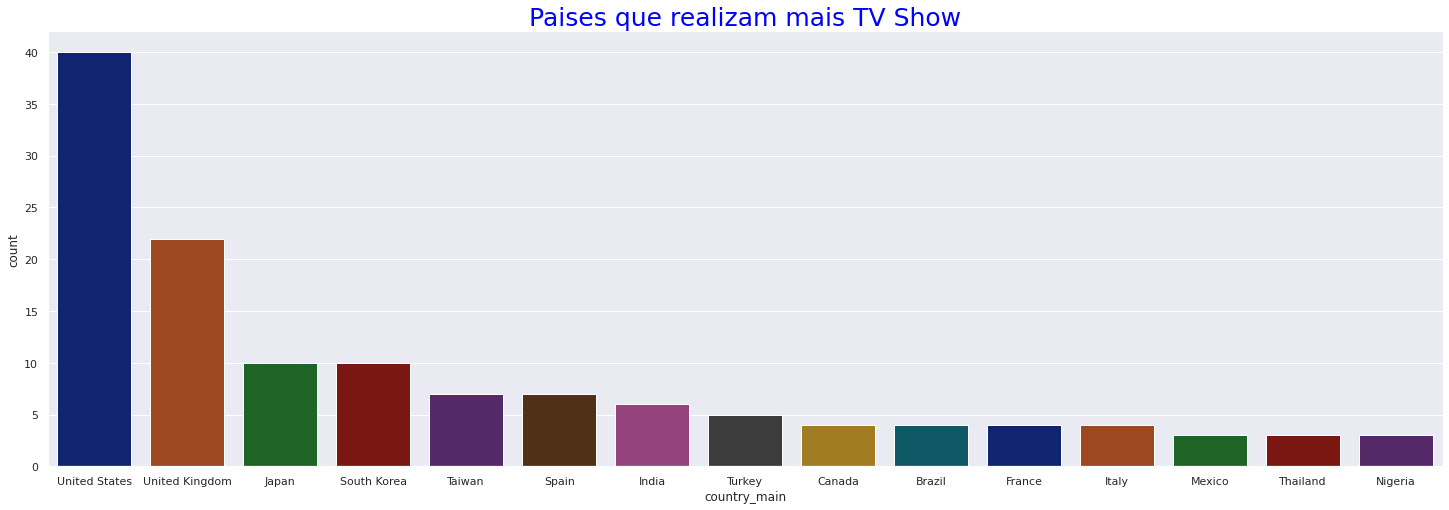

In [50]:
plt.figure(figsize=(25, 8))
sns.set(style = "darkgrid")
sns.countplot(x = "country_main", data = tv_df, palette = "dark", order = tv_df["country_main"].value_counts().index[0:15])
plt.title("Paises que realizam mais TV Show", fontsize = 25, color = "blue");

### <font color="orange">Compreender que conteúdo está disponível em diferentes paises</font>

In [51]:
# Gênero de filmes por país

columns = ["Genero", "country_main"]
gen_country = df[columns]
gen_country.head(6)


,Genero,country_main
1,Dramas,Mexico
2,Horror Movies,Singapore
3,Action & Adventure,United States
4,Dramas,United States
5,International TV Shows,Turkey
6,Horror Movies,Egypt


In [52]:
# Genres by Countries

# import squarify

# plt.figure(figsize = (20, 12))
# squarify.plot(value = gen_country["Genero"], label = gen_country["country_main"], sizes=.2, alpha = 0.8);
# plt.rc("font", size = 14);
# plt.show();


### <font color="orange">Número de programas lançados por ano</font>

Text(0.5, 1.0, 'Número de programas publicados cada ano')

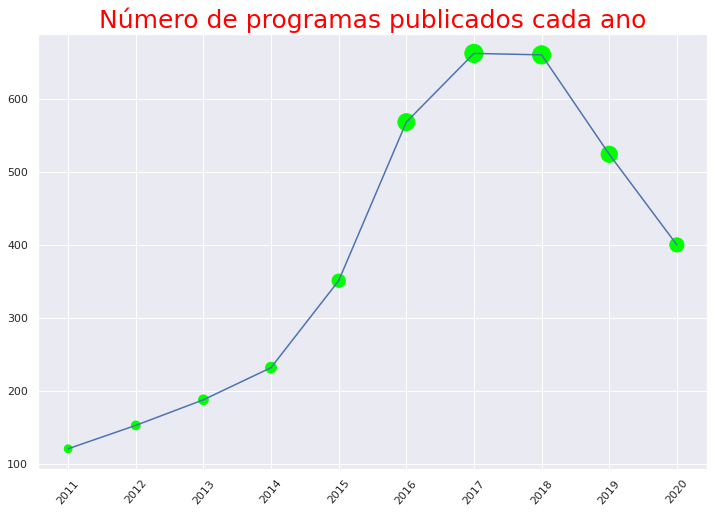

In [53]:
release = df["release_year"].value_counts()
release = release.sort_index(ascending = True)


plt.figure(figsize = (12, 8))
plt.plot(release[-11: -1])
plt.scatter(release[-11: -1].index, release[-11: -1].values, s=0.5*release[-11: -1].values, c="lime")
#plt.box(on=None)
plt.xticks(rotation=50)
plt.xticks(release[-11: -1].index)
plt.title("Número de programas publicados cada ano", color="red", fontsize=25)



### <font color="orange">Diretores com maior número de Filmes produzidos</font>

Insight:

* Os diretores Raúl Campos e Jan Suter (juntos) produziram o maior número de filmes. Até agora eles produziram $18$ filmes.

Text(0.5, 0, 'Número de Filmes lançados')

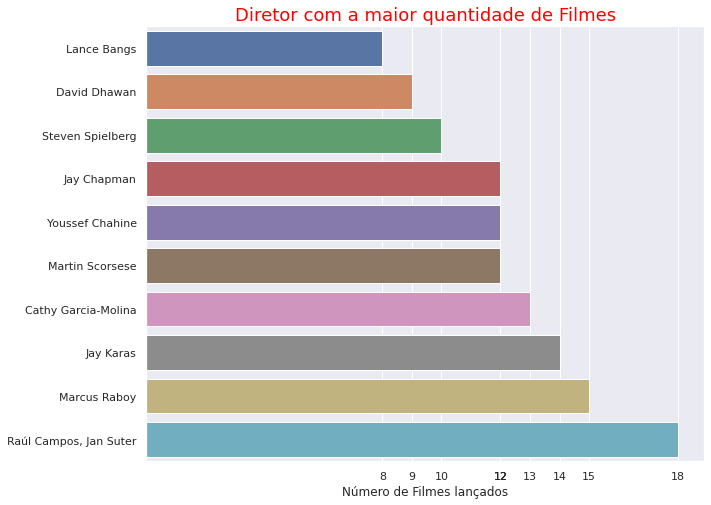

In [54]:
plt.figure(figsize=(10, 8))
sns.barplot(y=movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values)
plt.title("Diretor com a maior quantidade de Filmes", color="red", fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values)
plt.xlabel("Número de Filmes lançados")


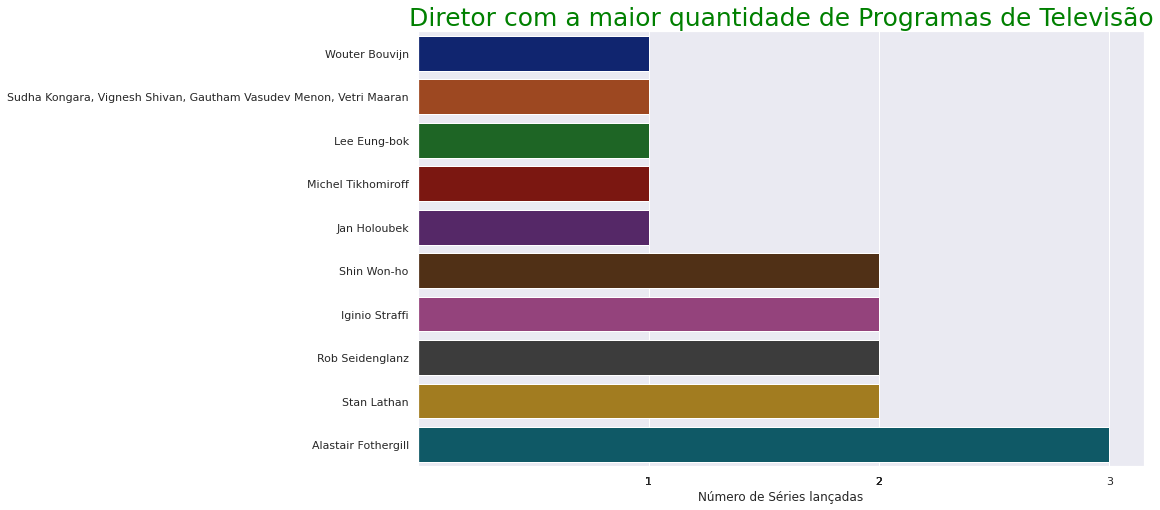

In [62]:
plt.figure(figsize=(13, 8))
sns.barplot(y=tv_df.director.value_counts()[:10].sort_values().index, palette="dark", x=tv_df.director.value_counts()[:10].sort_values().values)
plt.title("Diretor com a maior quantidade de Programas de Televisão", color="green", fontsize=25)
plt.xticks(tv_df.director.value_counts()[:10].sort_values().values)
plt.xlabel("Número de Séries lançadas");


### <font color="orange">Gênero mais populares na Netflix</font>

Text(0, 0.5, 'Número de conteúdo')

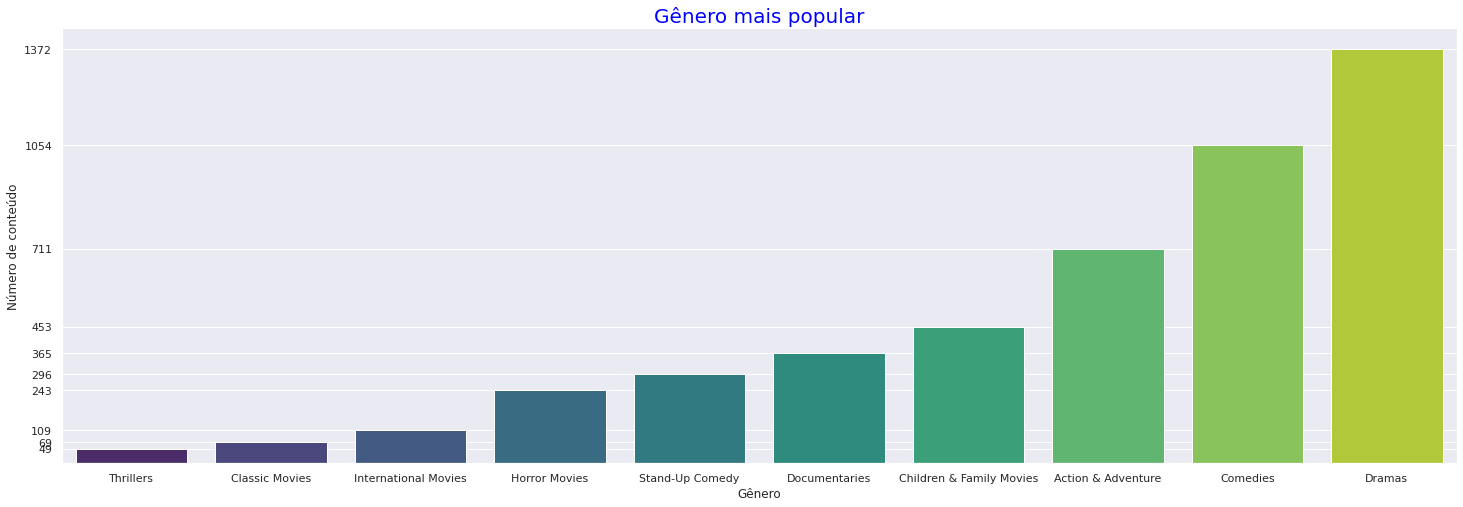

In [66]:
plt.figure(figsize=(25, 8))
sns.barplot(x=df.Genero.value_counts()[:10].sort_values().index, y=df.Genero.value_counts()[:10].sort_values().values, palette="viridis")
plt.title("Gênero mais popular", color="blue", fontsize=20)
plt.yticks(df.Genero.value_counts()[:10].sort_values().values)
plt.xlabel("Gênero")
plt.ylabel("Número de conteúdo")

### <font color="orange">Top Actor/Actresses na Netflix</font>

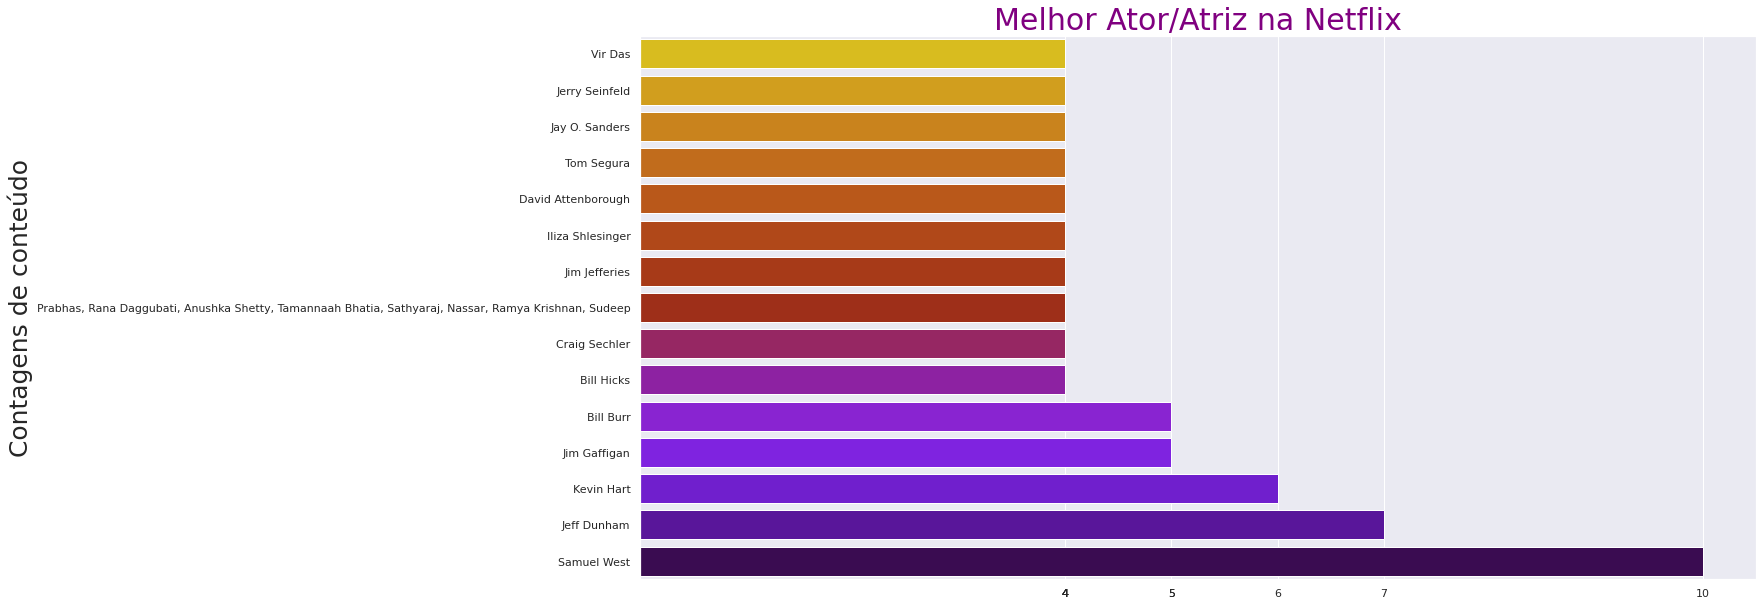

In [70]:
plt.figure(figsize=(20, 10))
sns.barplot(y=df.cast.value_counts()[:15].sort_values().index, x=df.cast.value_counts()[:15].sort_values().values, palette="gnuplot_r")
plt.title("Melhor Ator/Atriz na Netflix", color="purple", fontsize=30)
plt.xticks(df.cast.value_counts()[:10].sort_values().values)
plt.ylabel("Ator/Atriz", fontsize=20)
plt.ylabel("Contagens de conteúdo", fontsize=25);